#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.
 
4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
rows,columns =df.shape
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 148654 rows and 13 columns.


In [4]:
data_types = df.dtypes
print(data_types)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

BasePay           609
OvertimePay         4
OtherPay            4
Benefits        36163
Notes          148654
Status         148654
dtype: int64


In [6]:

total_pay_stats = df['TotalPay'].describe()

total_pay_mode = df['TotalPay'].mode()

print(f"Mean: {total_pay_stats['mean']}")
print(f"Median: {total_pay_stats['50%']}") 
print(f"Mode: {total_pay_mode.values[0] if not total_pay_mode.empty else 'No mode'}")
print(f"Minimum: {total_pay_stats['min']}")
print(f"Maximum: {total_pay_stats['max']}")

Mean: 74768.32197169267
Median: 71426.60999999999
Mode: 0.0
Minimum: -618.13
Maximum: 567595.43


In [7]:
salary_range = df['TotalPay'].max() - df['TotalPay'].min()

print(f"The range of salaries is: {salary_range}")

The range of salaries is: 568213.56


In [8]:
salary_std_dev = df['TotalPay'].std()

print(f"The standard deviation of salaries is: {salary_std_dev}")

The standard deviation of salaries is: 50517.005273949944


In [9]:
df_cleaned = df.dropna()
mean_value = df['TotalPay'].mean()
df['TotalPay'].fillna(mean_value, inplace=True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['TotalPay'] = imputer.fit_transform(df[['TotalPay']])
#explaination 
#Imputing with mean:
#this Method used for simplicity and when missing values are missing completely at random

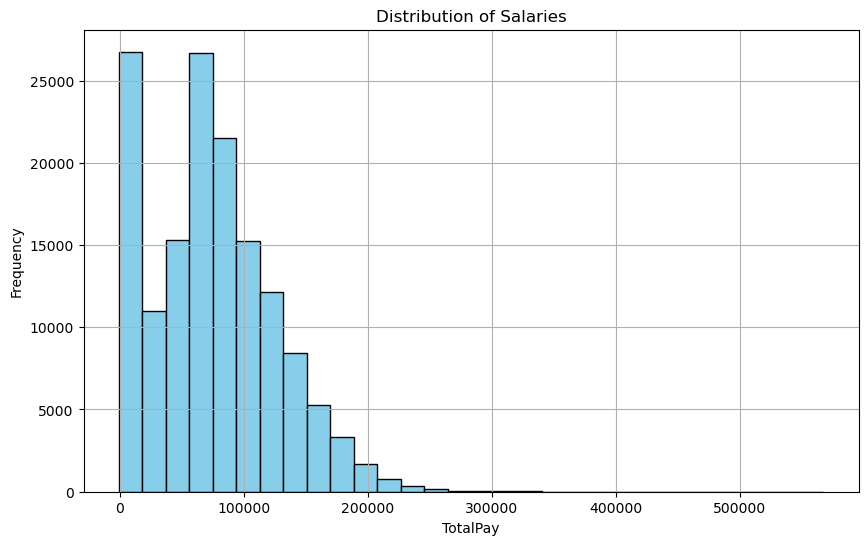

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


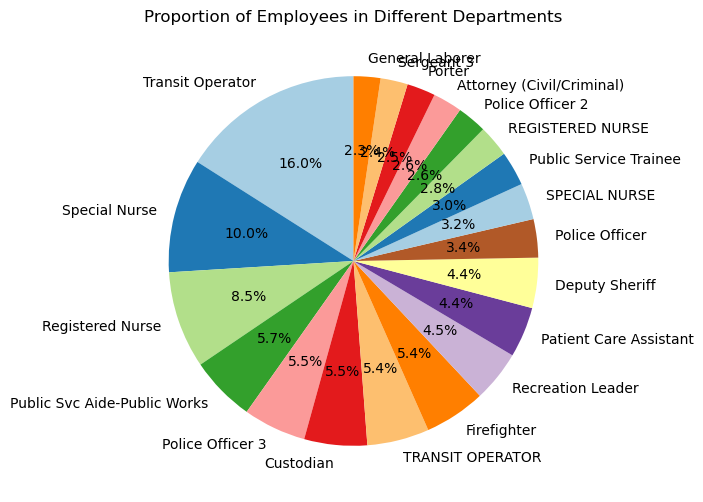

In [11]:
import matplotlib.pyplot as plt

department_counts = df['JobTitle'].value_counts().head(20)


plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Employees in Different Departments')
plt.show()


In [12]:
grouped_by_department = df.groupby('JobTitle').mean()

print(grouped_by_department)


                                                           Id       BasePay  \
JobTitle                                                                      
ACCOUNT CLERK                                    25734.819277  43300.806506   
ACCOUNTANT                                       24159.200000  46643.172000   
ACCOUNTANT INTERN                                28128.833333  28732.663958   
ACPO,JuvP, Juv Prob (SFERS)                     135284.000000  62290.780000   
ACUPUNCTURIST                                    18379.000000  66374.400000   
...                                                       ...           ...   
X-RAY LABORATORY AIDE                            22502.076923  47664.773077   
X-Ray Laboratory Aide                            98890.620000  46086.387100   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS   23392.000000  52609.910000   
Youth Comm Advisor                               99677.750000  39077.957500   
ZOO CURATOR                                      187

C:\Users\mohgh\AppData\Local\Temp\ipykernel_7576\62162345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_department = df.groupby('JobTitle').mean()


In [13]:
grouped_summary_stats = df.groupby('JobTitle')['TotalPay'].describe()

print(grouped_summary_stats)


                                                count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                    83.0  44035.664337   
ACCOUNTANT                                        5.0  47429.268000   
ACCOUNTANT INTERN                                48.0  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  62290.780000   
ACUPUNCTURIST                                     1.0  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                            26.0  52705.880385   
X-Ray Laboratory Aide                           100.0  50823.942700   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0  53632.870000   
Youth Comm Advisor                                4.0  41414.307500   
ZOO CURATOR                                       1.0  66686.560000   

                                                         std       min  \
Jo

In [14]:
average_salary_by_department = df.groupby('Department')['TotalPay'].mean()

print(average_salary_by_department)


KeyError: 'Department'

In [ ]:
salary_correlation = df['TotalPay'].corr(df['BasePay'])

print(f"Correlation between 'TotalPay' and 'BasePay': {salary_correlation}")

correlation_matrix = df.corr()

print(correlation_matrix)


In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['BasePay'], df['TotalPay'], alpha=0.5)
plt.title('Scatter Plot: BasePay vs TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()


Analysis Summary Report:

1-Basic Data Exploration:

The dataset contains a certain number of rows and columns.
Data types of each column have been identified.
Missing values have been checked in each column.

2-Descriptive Statistics:

Basic statistics such as mean, median, mode, minimum, and maximum salary have been calculated for the 'TotalPay' column.
The range of salaries and the standard deviation have been determined.

3-Data Cleaning:

Missing data have been handled using Imputing with mean.

4-Basic Data Visualization:

Histograms and bar charts have been created to visualize the distribution of salaries.
Pie charts have been used to represent the proportion of employees in different departments.

5-Grouped Analysis:

Data has been grouped by one or more columns to calculate summary statistics for each group.
Average salaries across different groups have been compared.

6- Simple Correlation Analysis:

Correlation between salary ('TotalPay') and another numerical column  has been identified.

A scatter plot has been created to visually represent the relationship between the two variables.
